# Visualização e Estrutura dos Dados Meteorológicos

Este *notebook* fornecerá uma visão geral do *dataset* e da disposição dos dados meteorológicos.

---

### Fonte dos Dados: GHCND

Os dados vêm do **Global Historical Climatology Network - Daily (GHCND)** e seguem a formtação descrida no link : https://www.ncei.noaa.gov/pub/data/ghcn/daily/readme.txt

### Formato da Tabela

O formato básico do *dataset* GHCND é o seguinte:

| Coluna | Descrição | Exemplo |
| :--- | :--- | :--- |
| **station** | Código da Estação | AE000041196 |
| **year** | Ano da Medição | 1944 |
| **month** | Mês da Medição | 3 |
| **day** | Dia da Medição | 20 |
| **element** | **Tipo de Métrica** | TMAX |
| **value** | Valor da Métrica | 380 |
| **mflag** | Bandeira de Medida | I |
| **qflag** | Bandeira de Qualidade | *(vazio)* |

* O campo **element** indica o tipo de métrica (ex: **TMAX** para Temperatura Máxima).
* A coluna **value** apresenta o valor da métrica para a estação e período indicados.

In [1]:
!pip install pandas
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd

parquet_path = "../data/dataset/data_final_optimized.parquet"
print("Iniciando carregamento ultrarrápido do Parquet...")

data = pd.read_parquet(parquet_path)

print("✅ Carregamento concluído. O DataFrame está pronto para uso.")

Iniciando carregamento ultrarrápido do Parquet...
✅ Carregamento concluído. O DataFrame está pronto para uso.


## Temperatura máxima X Temperatura mínima

A ideia da correlação entre temperatura máxima e minima de cada região surge do seguinte questionamento:

**Dias mais quentes, implicam noites mais quentes?**

E o que a análise nos mostra é que sim, existe está correlação,
é possível enxergar de maneira clara no gráfico atrávez da estação **AE000041196**, localizada na Arábia Saudita.

(A região foi escolhida pela sua situação climática extrema)

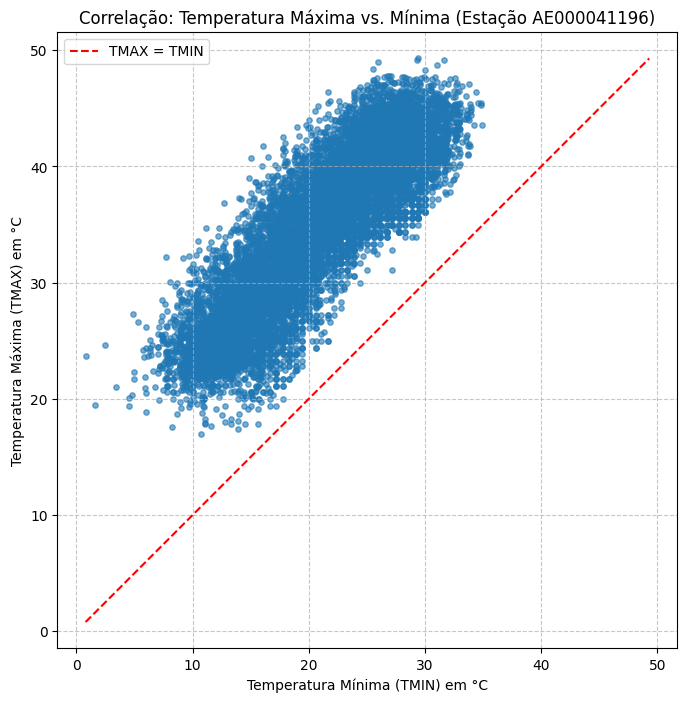

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

station_data = data[data["station"] == "AE000041196"].copy()

tmax_tmin = station_data[station_data["element"].isin(["TMAX", "TMIN"])].copy()
tmax_tmin["value_celsius"] = tmax_tmin["value"] * 0.1

# Cria as colunas TMAX e TMIN
pivot_df = tmax_tmin.pivot(index="date", columns="element", values="value_celsius").dropna()

plt.figure(figsize=(8, 8))
plt.scatter(pivot_df["TMIN"], pivot_df["TMAX"], alpha=0.6, s=15, color="#1f77b4")

max_val = max(pivot_df["TMAX"].max(), pivot_df["TMIN"].max())
min_val = min(pivot_df["TMAX"].min(), pivot_df["TMIN"].min())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='TMAX = TMIN')

plt.xlabel("Temperatura Mínima (TMIN) em °C")
plt.ylabel("Temperatura Máxima (TMAX) em °C")
plt.title("Correlação: Temperatura Máxima vs. Mínima (Estação AE000041196)")
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend()
plt.axis('equal')
plt.show()

### Acumulo de neve X Média de temperatura minima

Está visualização é bastante interrestante, poís não é possivel afirmar que quanto menor for
a temperatura média de uma região maior o acumulo de neve que ela ira ter.
O que podemos notar é que regiões que registram temperaturas próximas ao 0 graus célsius, possuem
um acumulo de média mais acentuado

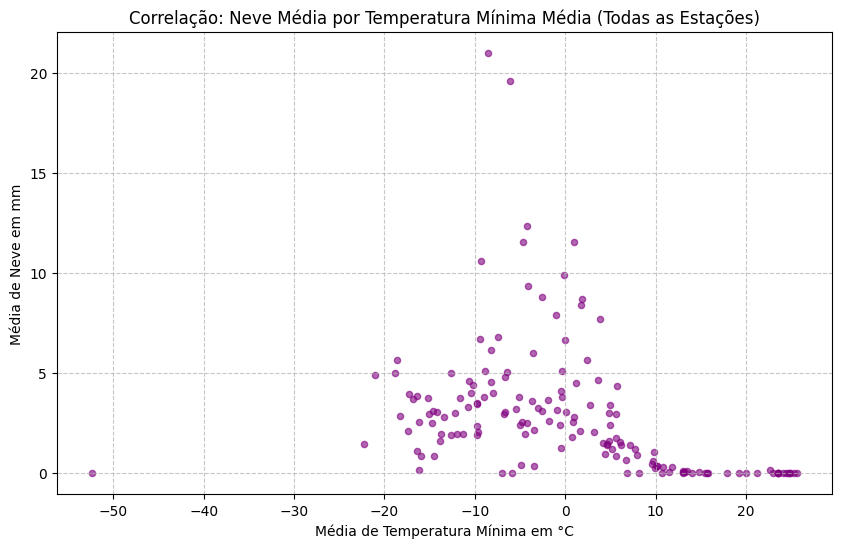

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

tmin_snow = data[data["element"].isin(["TMIN", "SNOW"])].copy()

tmin_snow.loc[tmin_snow['element'] == 'TMIN', 'value_celsius'] = tmin_snow['value'] * 0.1
tmin_snow.loc[tmin_snow['element'] == 'SNOW', 'value_celsius'] = tmin_snow['value']


medias_elementos = tmin_snow.groupby(['station', 'element'])['value_celsius'].mean().reset_index()
df_correlacao = medias_elementos.pivot(index='station', columns='element', values='value_celsius').dropna()

plt.figure(figsize=(10, 6))
plt.scatter(df_correlacao["TMIN"], df_correlacao["SNOW"], alpha=0.6, s=20, color='purple')

plt.xlabel("Média de Temperatura Mínima em °C")
plt.ylabel("Média de Neve em mm")
plt.title("Correlação: Neve Média por Temperatura Mínima Média (Todas as Estações)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Maiores e menores médias de temperaturas registradas por estação

* É possivel verificar que as estações com o prefixo YAM registram as menores temperaturas, elas ficam localizadas em bases
metereológicas na Antártida.

* A maior temperatura média registrada foi feita por uma estação localizada na Mauritânia, páis localizado na África Subsaariana,
as maiores temperaturas ficam distribuidas entre Oriente Médio, Sudoeste Asiático e África.

C:\Users\cit\AppData\Local\Temp\ipykernel_19192\2283674645.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada["temperature"] = data_filtrada["value"] * 0.1


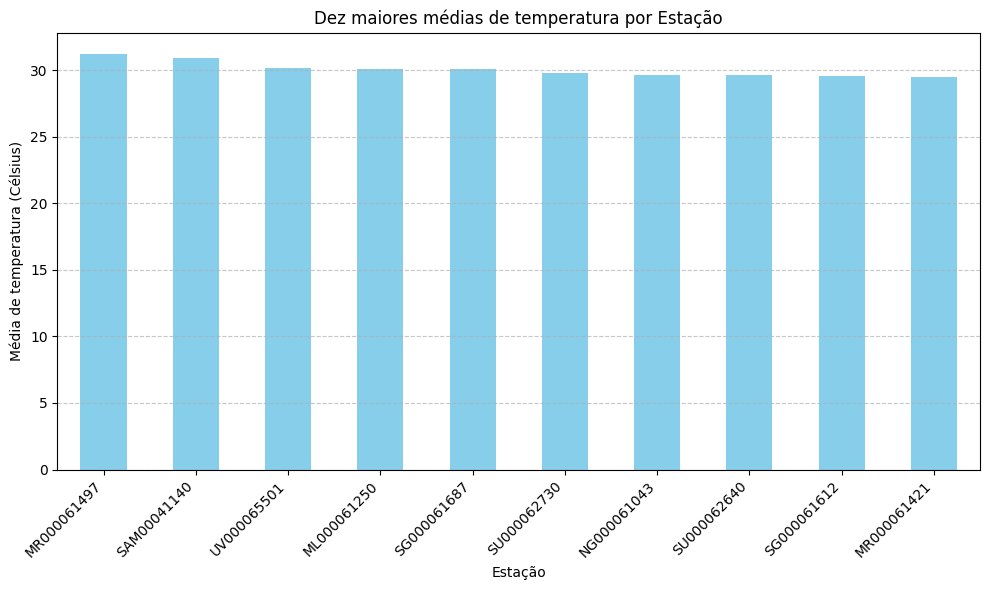

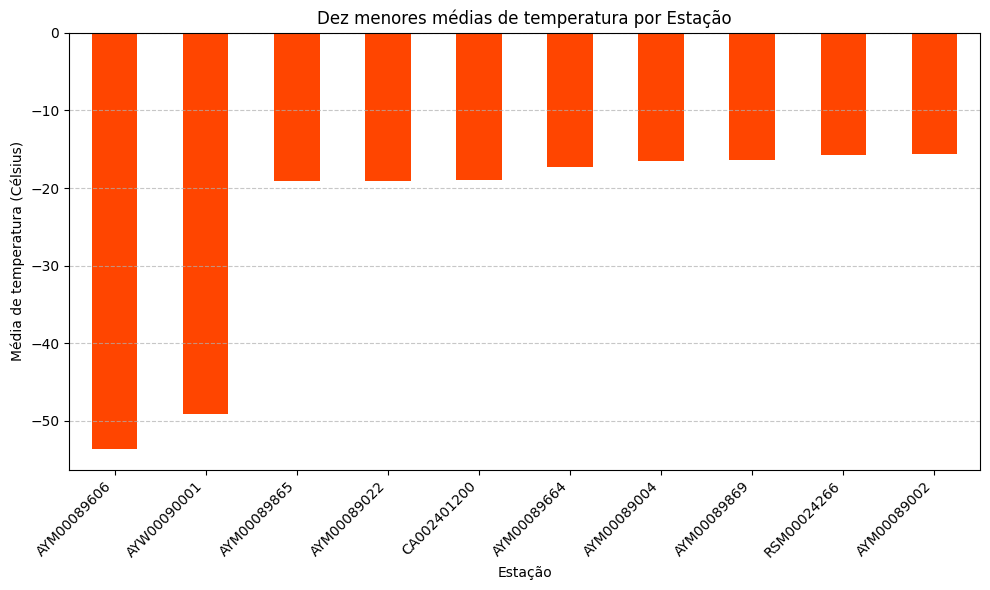

In [57]:
import pandas as pd
import matplotlib.pyplot as plt


data_filtrada = data[data["element"].isin(["TMAX", "TMIN"])]

data_filtrada["temperature"] = data_filtrada["value"] * 0.1

media_por_estacao = data_filtrada.groupby('station')['value'].mean() * 0.1

dez_maiores = media_por_estacao.nlargest(10).round(2)
dez_menores = media_por_estacao.nsmallest(10).round(2)

plt.figure(figsize=(10,6))

dez_maiores.plot(kind='bar', color='skyblue')

plt.title('Dez maiores médias de temperatura por Estação')
plt.xlabel('Estação')
plt.ylabel('Média de temperatura (Célsius)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,6))

dez_menores.plot(kind='bar', color='orangered')

plt.title('Dez menores médias de temperatura por Estação')
plt.xlabel('Estação')
plt.ylabel('Média de temperatura (Célsius)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
